(60000, 28, 28)


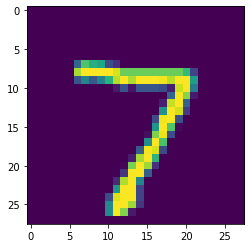

In [ ]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from keras.backend import dropout
import matplotlib.pyplot as plt
(X_train, y_train),(X_test,y_test) = mnist.load_data()
print(X_train.shape)
plt.imshow(X_test[0])

In [ ]:
X_train = X_train.reshape(60000,784) 
X_test = X_test.reshape(10000,784)
# Scale images to the [0, 1] range
X_train_scale = X_train.astype("float32") / 255
X_test_scale = X_test.astype("float32") / 255

# convert class vectors to binary class matrices
y_train_scale = to_categorical(y_train, 10)
y_test_scale = to_categorical(y_test, 10)


In [ ]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax')) 
model.summary() # hienthi noi dung model
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 512)               401920    
                                                                 
 dropout_33 (Dropout)        (None, 512)               0         
                                                                 
 dense_45 (Dense)            (None, 512)               262656    
                                                                 
 dropout_34 (Dropout)        (None, 512)               0         
                                                                 
 dense_46 (Dense)            (None, 512)               262656    
                                                                 
 dropout_35 (Dropout)        (None, 512)               0         
                                                                 
 dense_47 (Dense)            (None, 10)              

In [ ]:
history = model.fit(X_train_scale,y_train_scale,batch_size=128,epochs=500,verbose=1,
                    validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=80)])
score = model.evaluate(X_test_scale,y_test_scale,verbose=1)

Epoch 1/500
375/375 [==============================] - 2s 4ms/step - loss: 0.2953 - accuracy: 0.9077 - val_loss: 0.1249 - val_accuracy: 0.9632
Epoch 2/500
375/375 [==============================] - 1s 4ms/step - loss: 0.1223 - accuracy: 0.9638 - val_loss: 0.1218 - val_accuracy: 0.9657
Epoch 3/500
375/375 [==============================] - 1s 4ms/step - loss: 0.0914 - accuracy: 0.9730 - val_loss: 0.0987 - val_accuracy: 0.9748
Epoch 4/500
375/375 [==============================] - 3s 7ms/step - loss: 0.0754 - accuracy: 0.9778 - val_loss: 0.1030 - val_accuracy: 0.9754
Epoch 5/500
375/375 [==============================] - 2s 4ms/step - loss: 0.0665 - accuracy: 0.9812 - val_loss: 0.1137 - val_accuracy: 0.9740
Epoch 6/500
375/375 [==============================] - 1s 4ms/step - loss: 0.0560 - accuracy: 0.9835 - val_loss: 0.1107 - val_accuracy: 0.9762
Epoch 7/500
375/375 [==============================] - 1s 4ms/step - loss: 0.0560 - accuracy: 0.9851 - val_loss: 0.1184 - val_accuracy: 0.9769

In [ ]:
score = model.evaluate(X_test_scale,y_test_scale,verbose=1)
print('test loss: ',score[0])
print( 'test accuracy: ',score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3615 - accuracy: 0.9833
test loss:  0.36149662733078003
test accuracy:  0.983299970626831


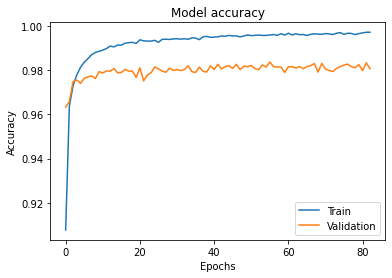

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show()


In [ ]:
prediction = model.predict(X_test_scale[:1])
print(prediction)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
